<a href="https://colab.research.google.com/github/maugarciav/ActInt2_Equipo_01/blob/main/Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/animal-faces")

print("Path to dataset files:", path)

100%|██████████| 696M/696M [00:09<00:00, 75.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/animal-faces/versions/1


In [2]:
!ls /root/.cache/kagglehub/datasets/andrewmvd/animal-faces/versions/1/afhq/

train  val


# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

Found 14630 images belonging to 3 classes.
Class indices: {'cat': 0, 'dog': 1, 'wild': 2}


<Figure size 3000x400 with 0 Axes>

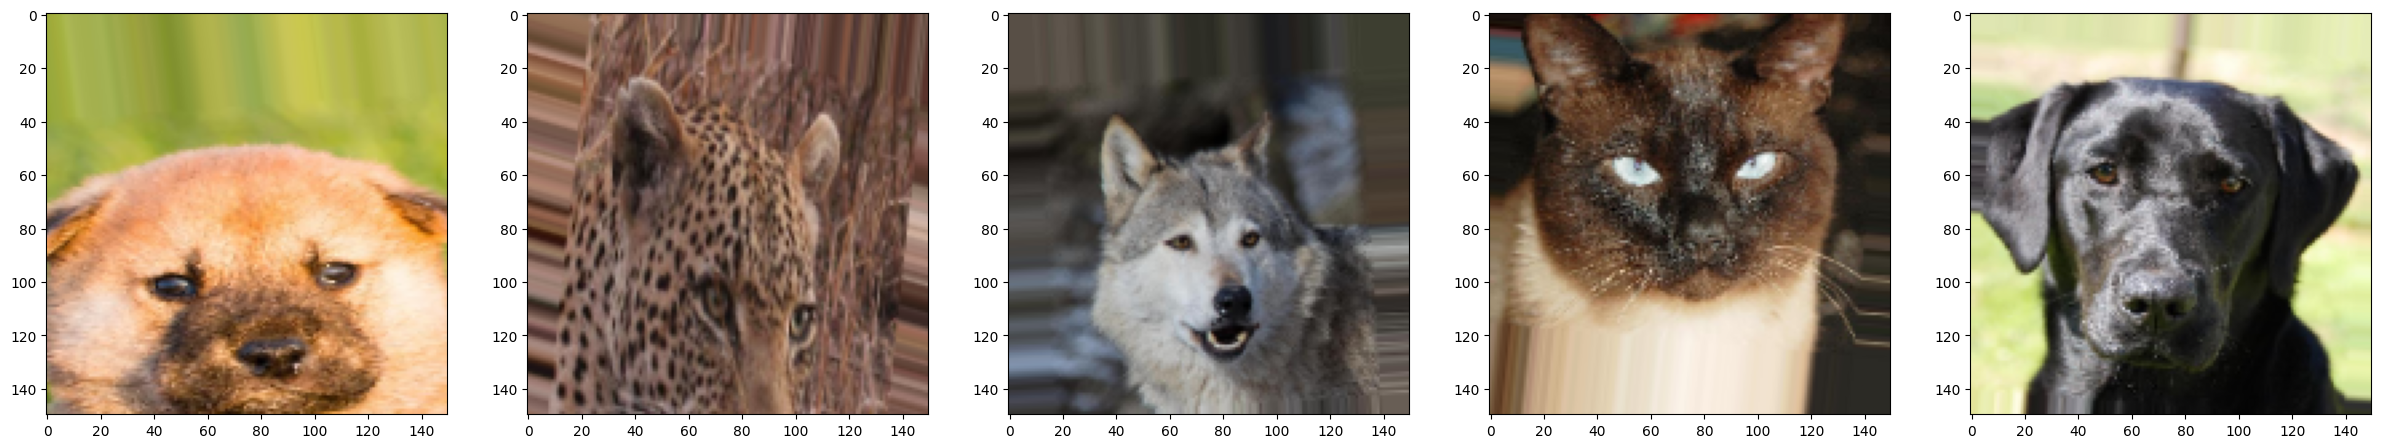

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers


base_dir = "/root/.cache/kagglehub/datasets/andrewmvd/animal-faces/versions/1/afhq"
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'val')

train_datagen = ImageDataGenerator(
		rescale = 1./255,
		rotation_range = 10,
		width_shift_range = 0.2,
	#	height_shift_range = 0.2,
	#	shear_range = 0.3,
		zoom_range = 0.3,
		horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
		train_dir,
		target_size = (150, 150),
		batch_size = 128,
		class_mode ='categorical',
)

print("Class indices:", train_generator.class_indices)

plt.figure(figsize=(30, 4))
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5):
    images, labels = next(train_generator)
    axarr[i].imshow(images[0])

plt.show()

<Figure size 640x480 with 0 Axes>

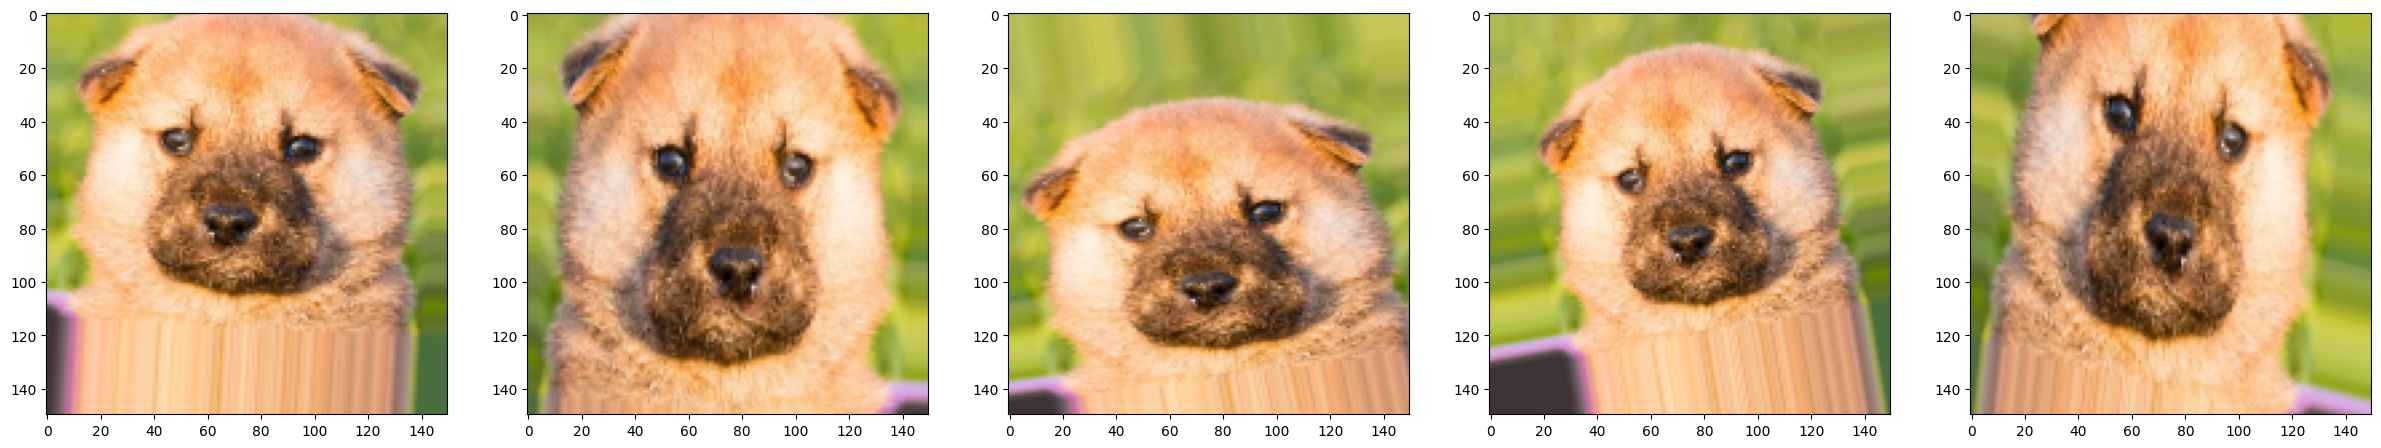

In [41]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

Class indices: {'cat': 0, 'dog': 1, 'wild': 2}
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


<Figure size 3000x400 with 0 Axes>

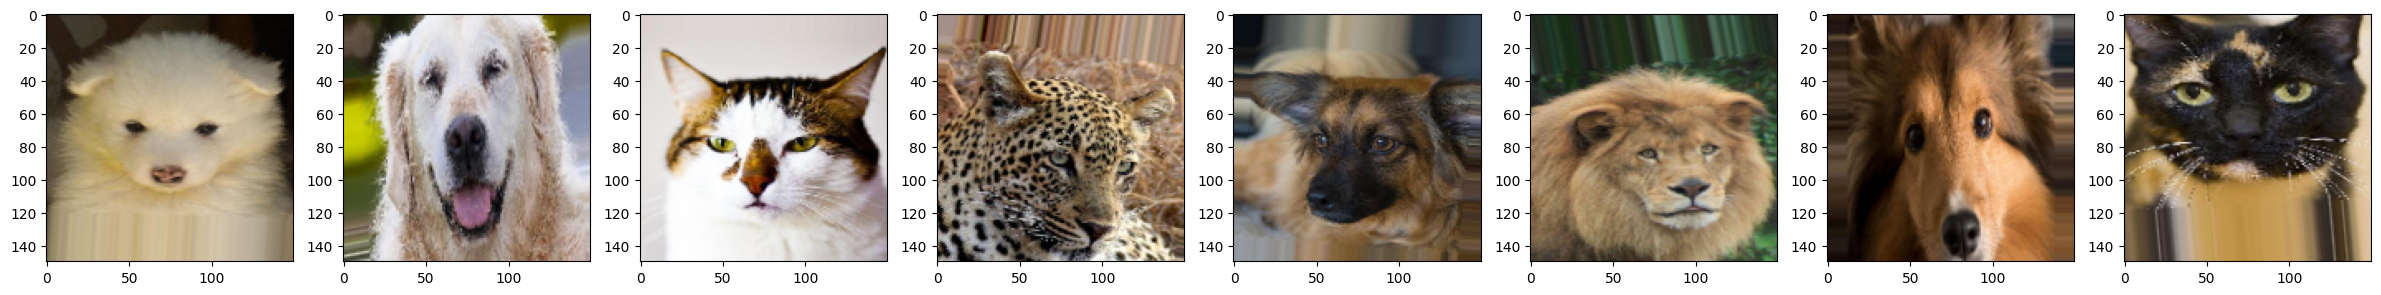

In [45]:
images , labels = train_generator[0]

#print(images.shape)
print("Class indices:", train_generator.class_indices)
print(labels[:8])


plt.figure(figsize=(30, 4))
# subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 8, figsize=(30, 8))

for i in range(8):
  axarr[i].imshow(images[i])

plt.show()

Esta es una red neuronal convolutiva:

In [46]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

#steps_per_epoch = 200 // 8 #entrenar con menos datos para que sea más rapido como prueba

num_classes = 3

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', # igual puede ser 'sparse_categorical_crossentropy'
            optimizer=optimizers.Adam(learning_rate=1e-4),
            metrics=['accuracy'])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       9,470,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,564,227 (36.48 MB)

 Trainable params: 9,564,227 (36.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
115/115 ━━━━━━━━━━━━━━━━━━━━ 109s 927ms/step - accuracy: 0.4788 - loss: 0.9968
Epoch 2/12
115/115 ━━━━━━━━━━━━━━━━━━━━ 103s 899ms/step - accuracy: 0.7400 - loss: 0.6282
Epoch 3/12
115/115 ━━━━━━━━━━━━━━━━━━━━ 104s 903ms/step - accuracy: 0.8197 - loss: 0.4797
Epoch 4/12
115/115 ━━━━━━━━━━━━━━━━━━━━ 103s 893ms/step - accuracy: 0.8549 - loss: 0.4027
Epoch 5/12
115/115 ━━━━━━━━━━━━━━━━━━━━ 106s 918ms/step - accuracy: 0.8728 - loss: 0.3430
Epoch 6/12
115/115 ━━━━━━━━━━━━━━━━━━━━ 102s 883ms/step - accuracy: 0.8986 - loss: 0.2911
Epoch 7/12
115/115 ━━━━━━━━━━━━━━━━━━━━ 101s 881ms/step - accuracy: 0.9032 - loss: 0.2662
Epoch 8/12
115/115 ━━━━━━━━━━━━━━━━━━━━ 104s 900ms/step - accuracy: 0.9047 - loss: 0.2581
Epoch 9/12
115/115 ━━━━━━━━━━━━━━━━━━━━ 102s 888ms/step - accuracy: 0.9128 - loss: 0.2409
Epoch 10/12
115/115 ━━━━━━━━━━━━━━━━━━━━ 102s 888ms/step - accuracy: 0.9115 - loss: 0.2438
Epoch 11/12
115/115 ━━━━━━━━━━━━━━━━━━━━ 101s 878ms/step - accuracy: 0.9234 - loss: 0.2153
Epoch 12

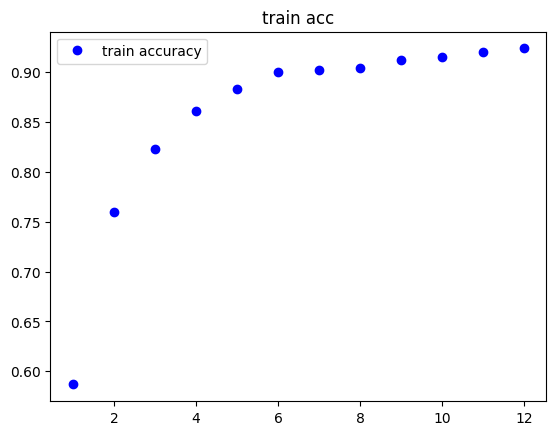

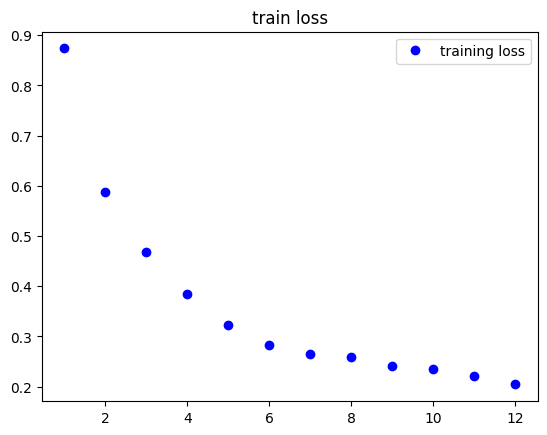

In [47]:
history = model.fit(
						train_generator,
						epochs = 12,
						#steps_per_epoch = steps_per_epoch
						)


acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [50]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 128,
					class_mode= 'categorical',
					shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator, steps = 50)
print('\ntest acc :\n', test_acc)


Found 1500 images belonging to 3 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9396 - loss: 22.4928  

test acc :
 0.9393333196640015


Class Names: ['cat', 'dog', 'wild']
Found 1500 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


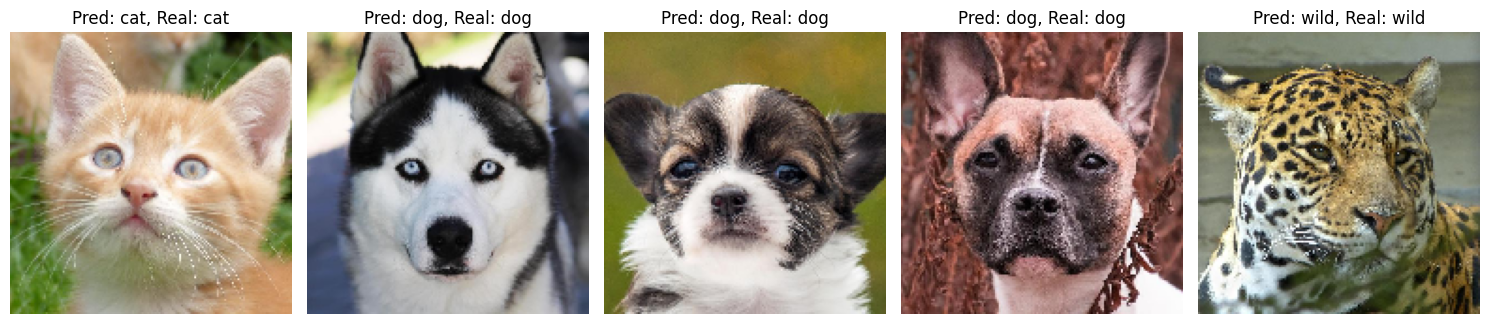

In [54]:
class_names = list(test_generator.class_indices.keys())
print("Class Names:", class_names)

#Prueba Visual
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=5,
    class_mode='categorical',
    shuffle=True
)

images, labels_one_hot = next(test_generator)

predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

true_labels = np.argmax(labels_one_hot, axis=1)

images_desnormalizadas = (images * 255).astype(np.uint8)

plt.figure(figsize=(15, 5))
for i in range(test_generator.batch_size):
    plt.subplot(1, test_generator.batch_size, i + 1)
    plt.imshow(images_desnormalizadas[i])
    predicted_label = class_names[predicted_classes[i]]
    true_label = class_names[true_labels[i]]
    plt.title(f"Pred: {predicted_label}, Real: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()